# 📊 Análisis de resultados de modelos predictivos
Este notebook carga las métricas de diferentes modelos (SVR, RF, LSTM, etc.) evaluados en distintos horizontes de predicción y genera gráficos comparativos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV con métricas
df = pd.read_csv("../outputs/metrics.csv")



## 📈 Gráficos de MAE, RMSE y NRMSE por modelo y semanas de predicción

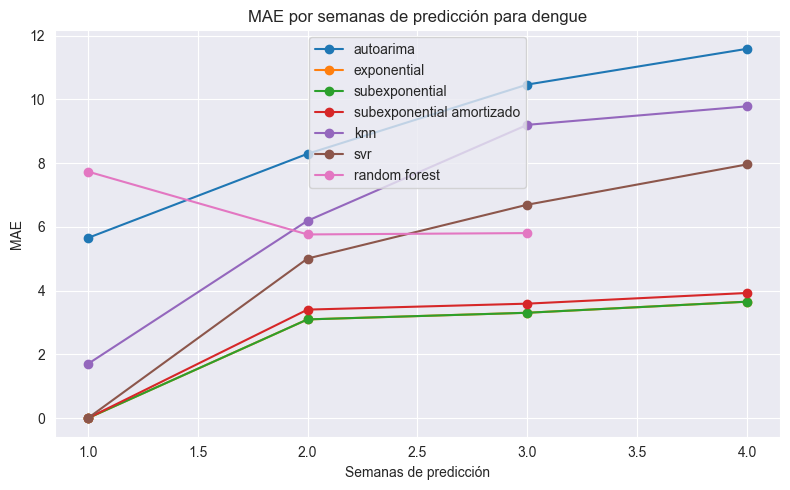

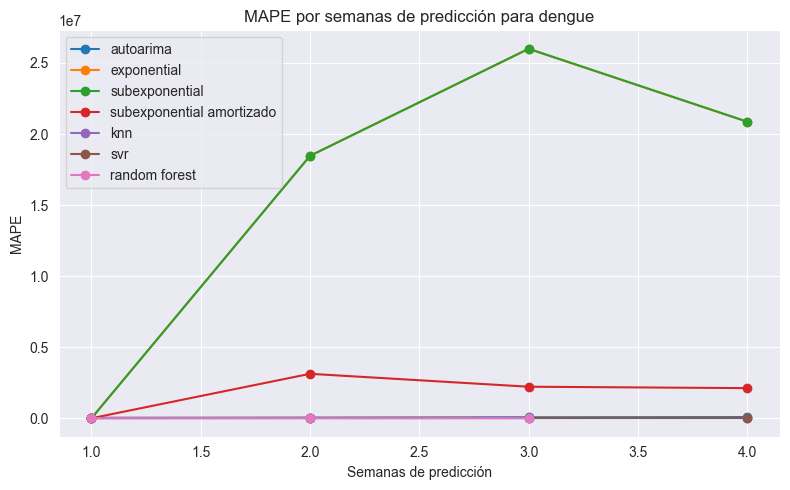

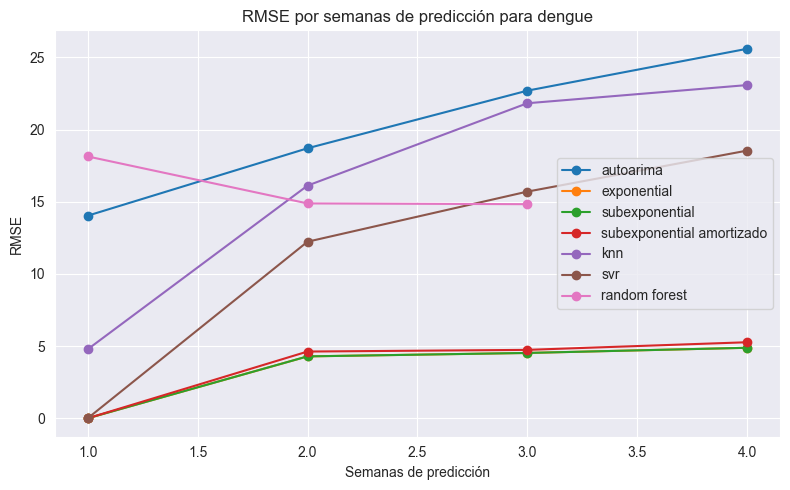

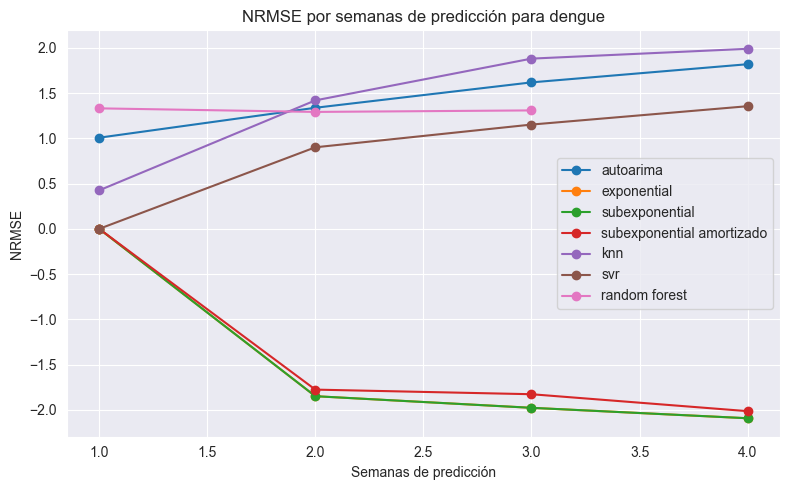

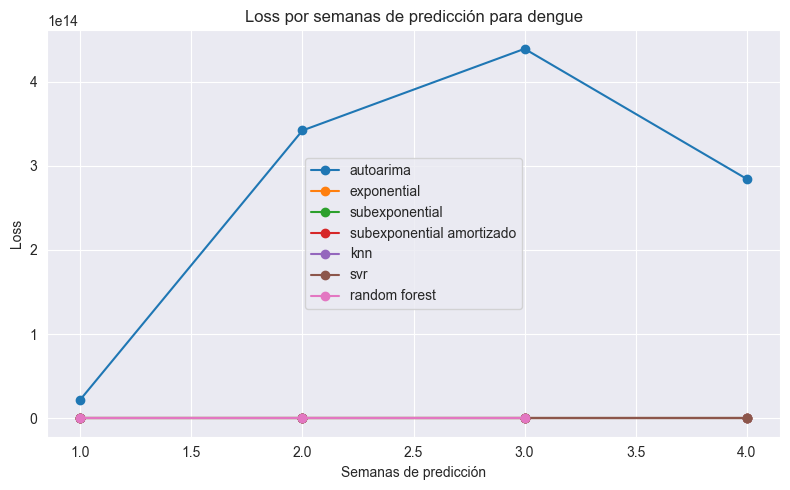

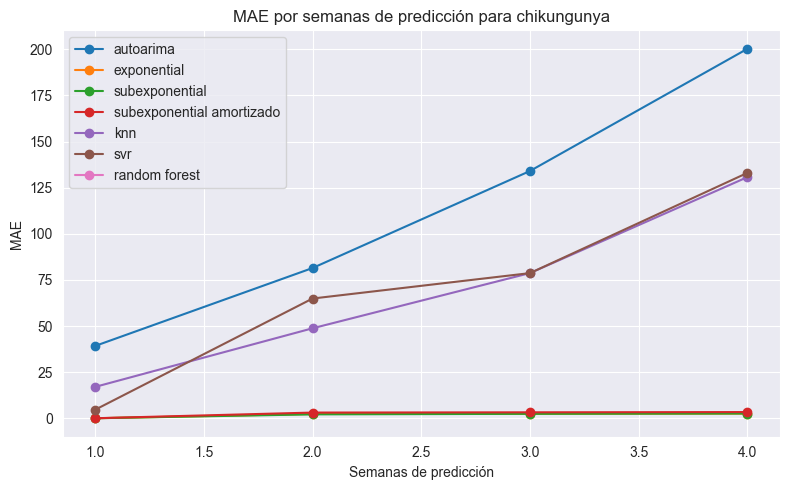

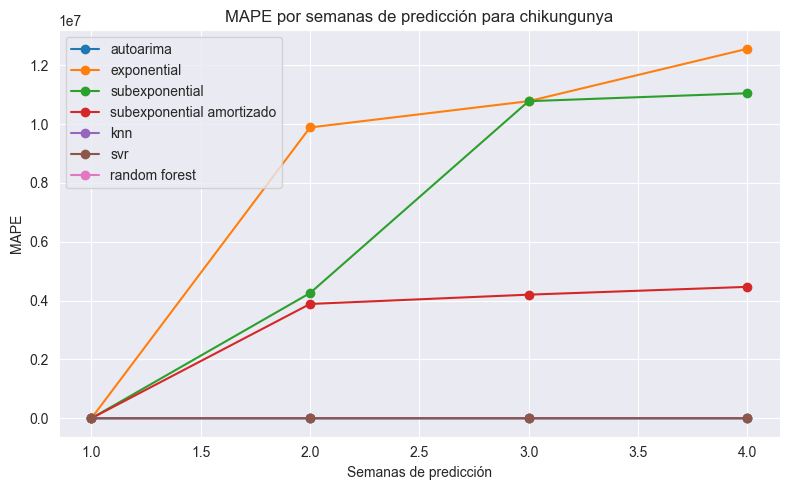

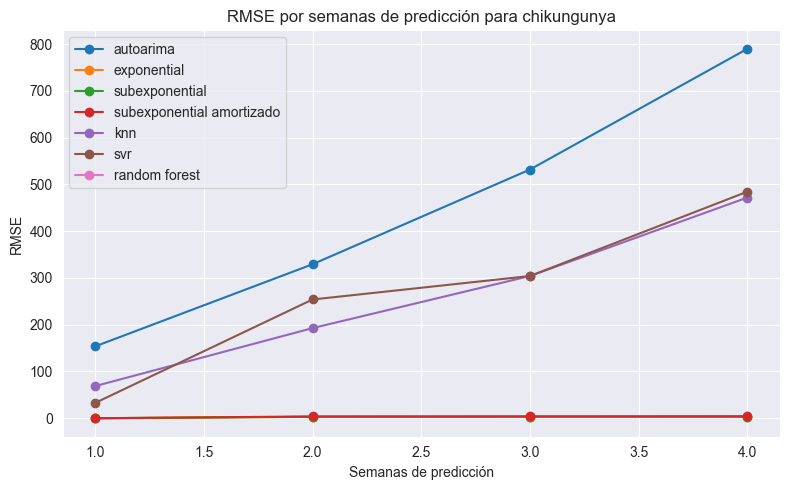

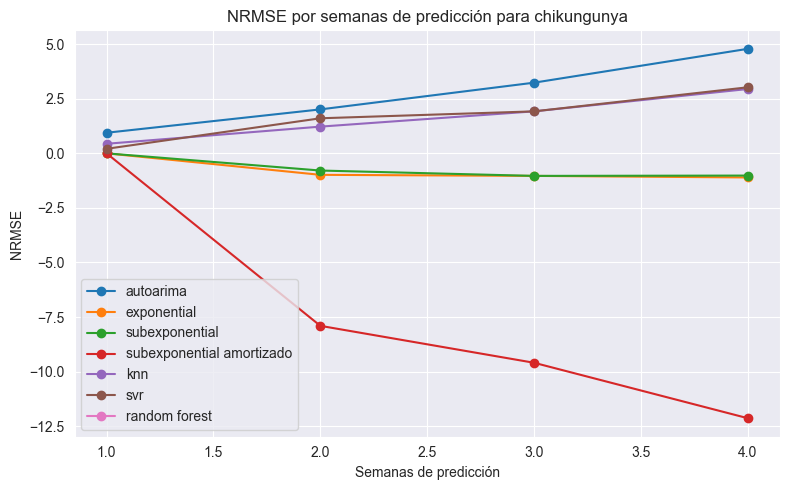

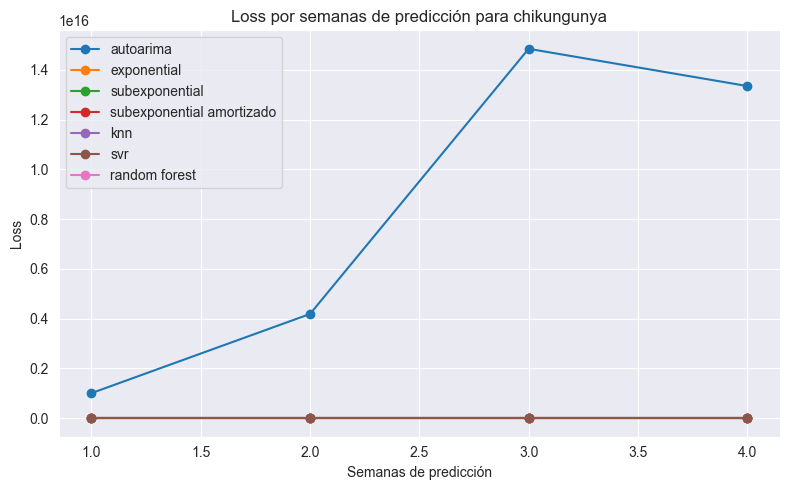

In [3]:
# Asegurar que Prediction Weeks sea numérico
df["Prediction Weeks"] = pd.to_numeric(df["Prediction Weeks"], errors='coerce')

# Definir métricas y métodos
metrics = ['MAE','MAPE','RMSE','NRMSE','Loss']
methods = df['Method'].unique()
diseases = df['Disease'].unique()
# Generar gráficos
for disease in diseases:
    for metric in metrics:
        plt.figure(figsize=(8, 5))
        for method in methods:
            method_df = df[(df['Method'] == method) & (df['Disease'] == disease)].copy()

            method_df = method_df.sort_values(by='Prediction Weeks')
            plt.plot(method_df["Prediction Weeks"], method_df[metric], marker='o', label=method)

        plt.title(f'{metric} por semanas de predicción para {disease}')
        plt.xlabel('Semanas de predicción')
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()



## 📋 Resumen de errores promedio por modelo

In [24]:

filtered_df = df[df["Method"].isin(["knn"])]
filtered_df = filtered_df[['Method', 'Disease','Prediction Weeks','MAE', 'MAPE','RMSE', 'NRMSE']]
filtered_df.to_latex("../outputs/filtered_metrics.tex")

TypeError: agg function failed [how->mean,dtype->object]